In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
dataset = pd.read_csv(r"D:\AI ML\Internship work\Task 3\data.csv")

# Data Exploration

In [44]:
df = dataset

In [45]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
df.shape

(569, 33)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [48]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [49]:

print(df['diagnosis'].value_counts())
print(df['diagnosis'].value_counts(normalize=True))

diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


# EDA (Exploratory Data Analysis)

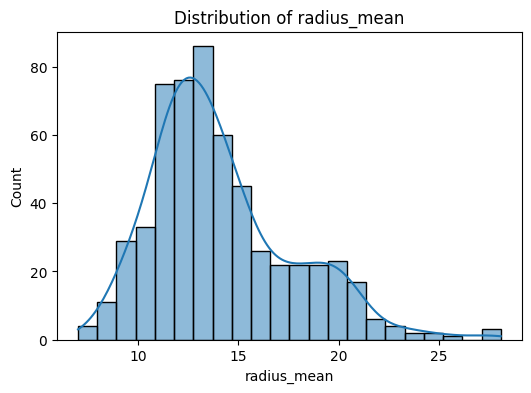

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(df['radius_mean'], kde=True)
plt.title('Distribution of radius_mean')
plt.show()


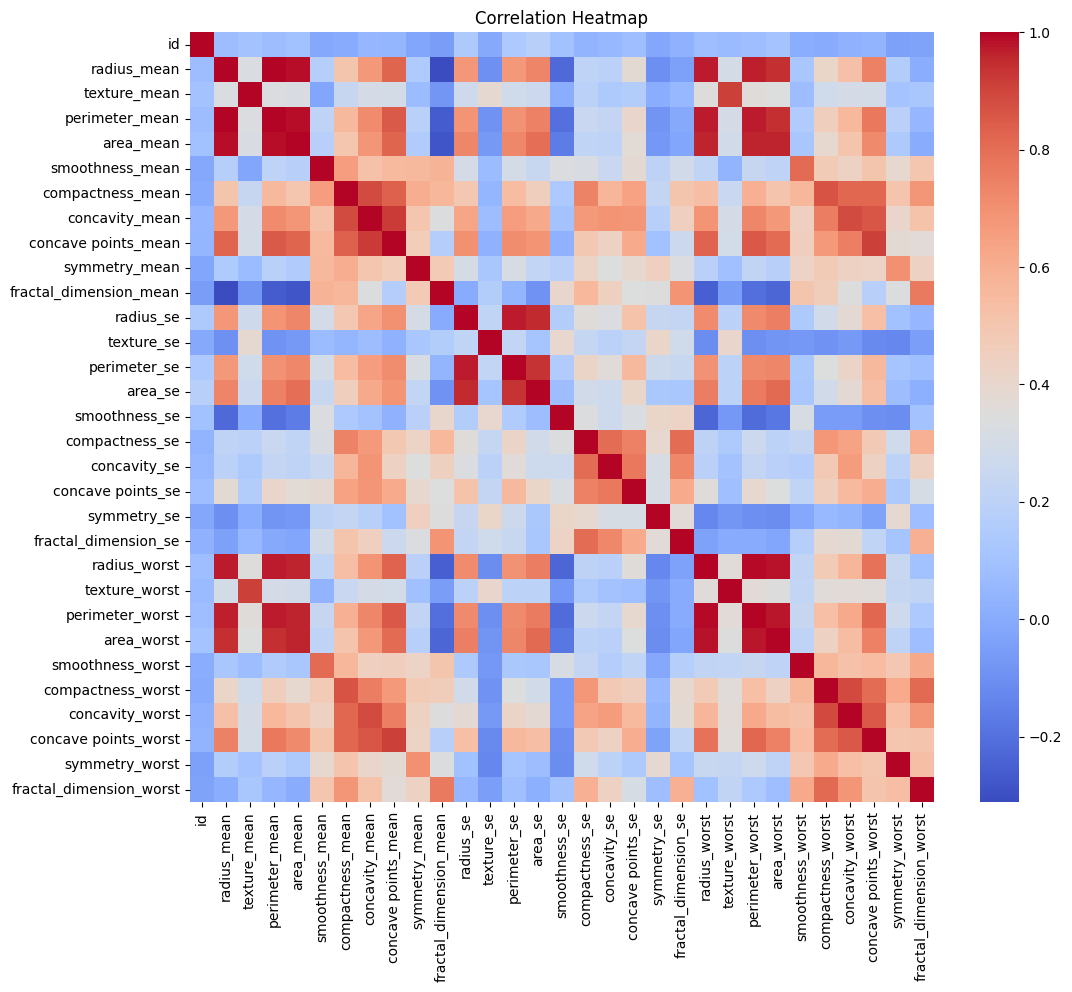

Text(0, 0.8, 'Correlation Heatmap:\nThis plot shows how strongly each numeric feature is related to every other feature.\nRed color means strong positive correlation, blue means negative correlation.\nHighly correlated features may contain similar information.')

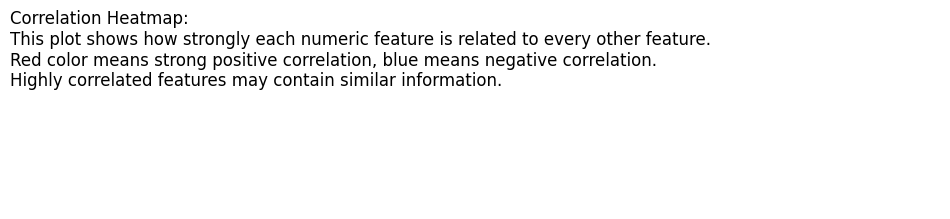

In [51]:
# Only numeric columns for correlation
numeric_features = df.select_dtypes(include=[np.number]).columns.drop('Unnamed: 32', errors='ignore')

plt.figure(figsize=(12,10))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(12,2))
plt.axis('off')
plt.text(
    0, 0.8,
    "Correlation Heatmap:\n"
    "This plot shows how strongly each numeric feature is related to every other feature.\n"
    "Red color means strong positive correlation, blue means negative correlation.\n"
    "Highly correlated features may contain similar information.",
    fontsize=12
)

# Remove Irrelevant Columns

In [52]:
# Irrelevant columns ko drop karein (jaise 'id' aur 'Unnamed: 32')
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Handling Missing Values

In [53]:

df = df.fillna(df.median(numeric_only=True))


In [54]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler



In [56]:

feature_cols = df.columns.drop('diagnosis')
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M     1.097064     -2.073335        1.269934   0.984375   
1         M     1.829821     -0.353632        1.685955   1.908708   
2         M     1.579888      0.456187        1.566503   1.558884   
3         M    -0.768909      0.253732       -0.592687  -0.764464   
4         M     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.359293 

# Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder


In [58]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

print(df['diagnosis'].value_counts())
print(dict(zip(le.classes_, le.transform(le.classes_))))

diagnosis
0    357
1    212
Name: count, dtype: int64
{'B': np.int64(0), 'M': np.int64(1)}


# Data Spliting

In [59]:
from sklearn.model_selection import train_test_split


In [60]:

X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [62]:

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


# Models Training

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



# 1. Logistic Regression

In [64]:

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




# 2. Decision Tree

In [65]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114




# 3. Random Forest

In [66]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114




# 4. XGBoost (bonus)

In [67]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\Users\Subhan Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:51:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Comprehensive Evaluation

In [68]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt


In [69]:

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}


In [70]:

y_preds = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}



Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



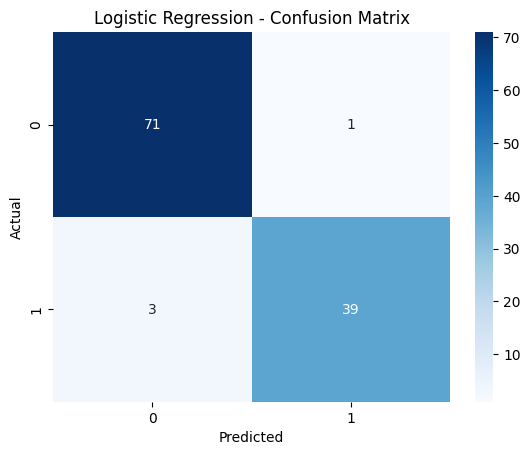


Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



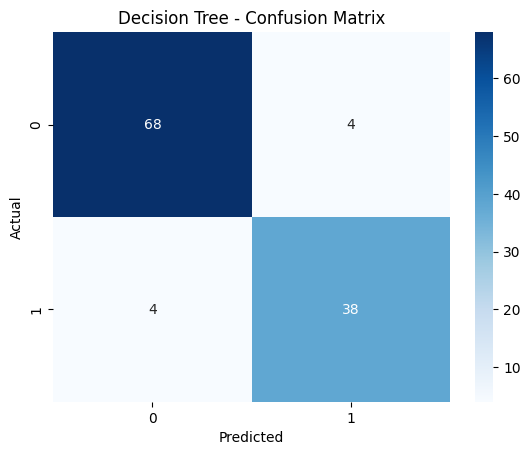


Random Forest
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



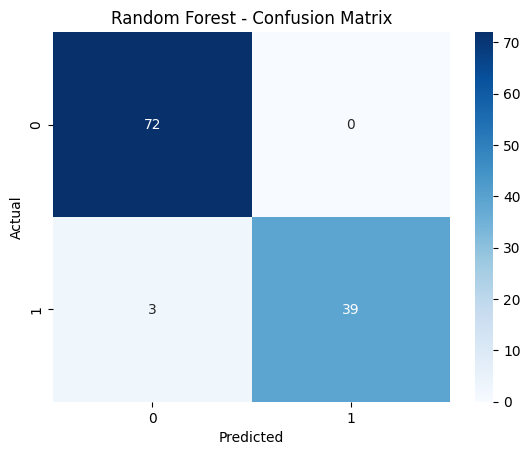


XGBoost
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



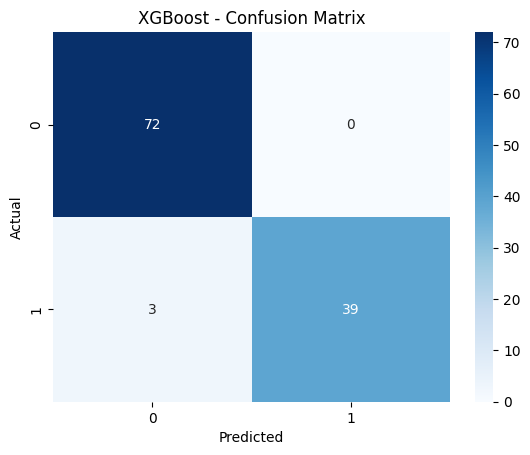

In [71]:

# Evaluation metrics and confusion matrix
for name, model in models.items():
    print(f"\n{name}")
    print(classification_report(y_test, y_preds[name]))
    cm = confusion_matrix(y_test, y_preds[name])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


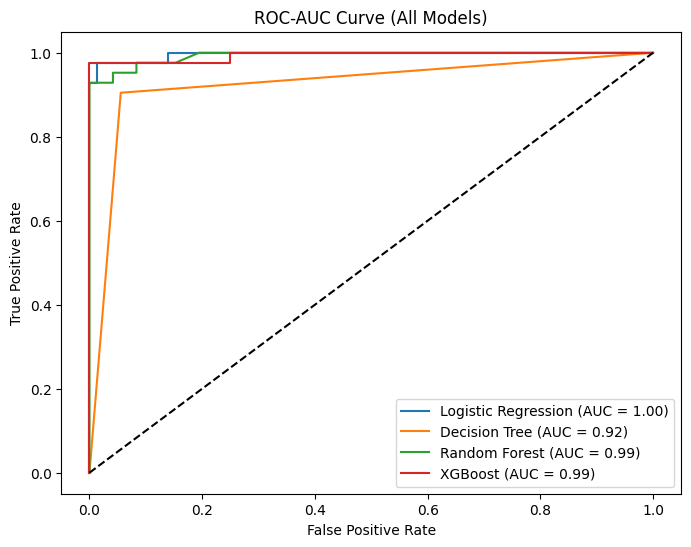

In [72]:

# ROC-AUC Curve for all models
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (All Models)")
plt.legend(loc="lower right")
plt.show()



# Comparison Table

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [74]:

# Sabhi models ke metrics calculate karein
results = []
for name, y_pred in y_preds.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })


In [75]:

results_df = pd.DataFrame(results)


# Best Model

In [76]:
# Best model ko highlight karne ke liye ek naya column
best_model = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
results_df['Best'] = results_df['Model'].apply(lambda x: '✅' if x == best_model else '')



In [77]:
# Table print karein
print("Comparison Table (Best model marked with ✅):")
print(results_df.to_string(index=False))

Comparison Table (Best model marked with ✅):
              Model  Accuracy  Precision   Recall  F1-Score Best
Logistic Regression  0.964912   0.975000 0.928571  0.951220     
      Decision Tree  0.929825   0.904762 0.904762  0.904762     
      Random Forest  0.973684   1.000000 0.928571  0.962963    ✅
            XGBoost  0.973684   1.000000 0.928571  0.962963     


# Conclusion

c:\Users\Subhan Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


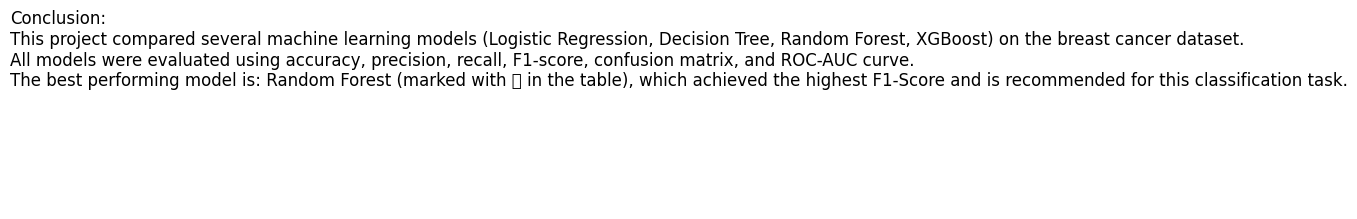

In [78]:
plt.figure(figsize=(12,2))
plt.axis('off')
plt.text(
    0, 0.8,
    "Conclusion:\n"
    "This project compared several machine learning models (Logistic Regression, Decision Tree, Random Forest, XGBoost) on the breast cancer dataset.\n"
    "All models were evaluated using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC curve.\n"
    f"The best performing model is: {best_model} (marked with ✅ in the table), which achieved the highest F1-Score and is recommended for this classification task.",
    fontsize=12
)
plt.show()